# Brady Hobson, Sara Kent
# DS4420
# Final Project Python - CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Conv1D, Flatten, Dense, Dropout, Input, MaxPooling1D
from keras.optimizers import Adam

2025-04-06 14:26:34.245020: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load dfs 
dayahead_df = pd.read_csv("dayahead_data.csv")
load_forecast = pd.read_csv("load_forecast_data.csv")
lmp_df = pd.read_csv("lmp_data.csv")

In [3]:
# merge dfs on time
merged_df = dayahead_df.merge(load_forecast, on='interval_start_utc').merge(lmp_df, on='interval_start_utc')

# convert time to datetime
merged_df['interval_start_utc'] = pd.to_datetime(merged_df['interval_start_utc'])
merged_df["month"] = merged_df["interval_start_utc"].dt.month

main_df = merged_df[["day_ahead_lmp", "lmp", "load_forecast", "month"]]
X = main_df[["day_ahead_lmp", "load_forecast", "month"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
bias_col = np.ones((X.shape[0], 1))
X_scaled = np.concatenate((bias_col, scaled_features), axis=1)
y = main_df["lmp"]

# split data
train_size = int(0.8 * len(X))
X_train = X_scaled[:train_size]
X_test = X_scaled[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [4]:
# reshape data for CNN
X_train = np.expand_dims(X_train, axis=2) 
X_test = np.expand_dims(X_test, axis=2)

# start model
inpx = Input(shape=(X_train.shape[1], 1))

# 1D Convolutional layers
con_layer = Conv1D(64, 2, activation='linear', padding='same')(inpx)
pool_layer = MaxPooling1D(pool_size=2)(con_layer)

con_layer2 = Conv1D(128, 2, activation='linear', padding='same')(pool_layer)

flat = Flatten()(con_layer2)

# MLP layers
dense_input = Dense(128, activation='linear')(flat)
output = Dense(1)(dense_input)

# compile model
model = Model([inpx], output)
model.compile(optimizer=Adam(learning_rate=0.015), loss='mean_squared_error')

In [5]:
# fit model
#fitted = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
fitted = model.fit(X_train, y_train, epochs=50, batch_size=200)
# test the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

Epoch 1/50


/Users/sarakent/opt/miniconda3/lib/python3.9/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(200, 4, 1))
  warnings.warn(msg)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1349.8495
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1451.3785
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 812.4053
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1214.7267
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 939.9540
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1252.3964
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1816.6801
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1375.4485
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1247.6692
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 928.4821
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 971.1360
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1460.3242
Epoch 13/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1349.7800
Epoch 14/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1294.4471
Epoch 15/50
200/200 ━━━━━━━━━━

/Users/sarakent/opt/miniconda3/lib/python3.9/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 4, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 230.0927
Test Loss (MSE): 282.0746765136719


214/313 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step

/Users/sarakent/opt/miniconda3/lib/python3.9/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 4, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


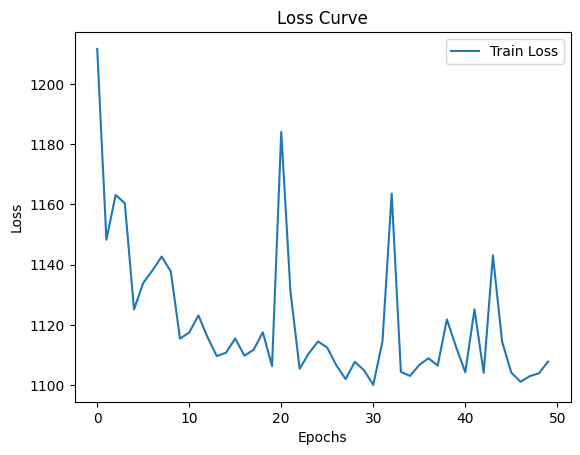

In [6]:
# predict using test data
y_pred = model.predict(X_test)

plt.plot(fitted.history['loss'], label='Train Loss')
#plt.plot(fitted.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

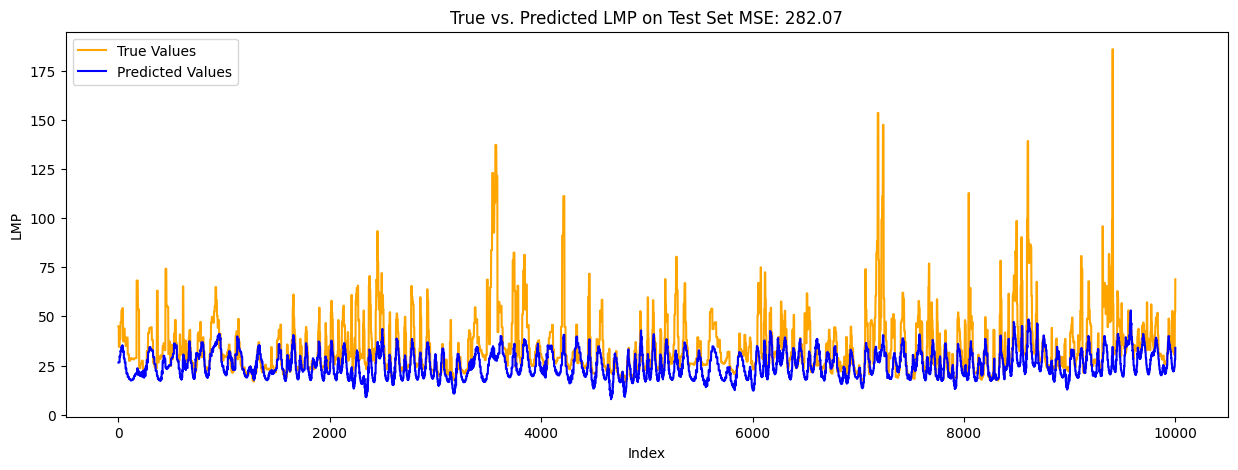

In [7]:
# plot values
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred.flatten())
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True Values', color='orange')
plt.plot(y_pred, label='Predicted Values', color='blue')
plt.title(f'True vs. Predicted LMP on Test Set MSE: {test_loss:.2f}')
plt.xlabel('Index')
plt.ylabel('LMP')
plt.legend()
plt.show()